In [1]:
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from make_da_plots import make_base_plots, make_wind_base_plots
import importlib
from plot_driver import da_base_plots
import time_series as time_series
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import xarray as xr

/lfs5/BMC/wrfruc/gge/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Interactive Plot Making

### Get date

In [8]:
variable = 't'
# Current time
# now_utc = datetime.now(timezone.utc)
# ex_time = now_utc.replace(hour=0, minute=0, second=0, microsecond=0)
# date_str = ex_time.strftime('%Y%m%d%H')

# Custom time
date_str = '2024080114' 

In [9]:
day_str = date_str[:8]
hour_str = date_str[-2:]

### RTMA GSI diag file paths

In [10]:
#temperature diag files jet
rtma_diag_ges_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_{variable}_ges.{date_str}.nc4.gz'
rtma_diag_anl_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_{variable}_anl.{date_str}.nc4.gz'

In [11]:
# #temperature diag files local
# rtma_diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
# rtma_diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

### Query data

In [12]:
rtma_diag_ges = Conventional(rtma_diag_ges_fp)
rtma_diag_anl = Conventional(rtma_diag_anl_fp)
rtma_df_ges = rtma_diag_ges.get_data()
rtma_df_anl = rtma_diag_anl.get_data()

In [13]:
print(len(rtma_df_ges))

129509


In [14]:
print(len(rtma_df_anl))

129509


## Filtering dataframes

### Set filter arguments

In [15]:
station_ids = ['NLOYR3BA']
obs_types_sur_temp = [181, 187, 188, 195]
obs_types_air_temp = [126, 133]
use = 1
elv_range = (0,20)
p_range = (500,1000)
err_range = (0, 4)

# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (251, 258) #to convert from deg west to deg east (360 - deg west)

### Filter df

In [16]:
# temp examples
# rtma_fil_dfs = filter_df([rtma_df_anl, rtma_df_ges], hem='CONUS', obs_types=obs_types_air_temp, use=1)
rtma_fil_dfs = filter_df([rtma_df_anl, rtma_df_ges], obs_types=obs_types_sur_temp, use=1,
                    lat_range=co_lats,lon_range=co_lons)
    
rtma_df_anl_fil = rtma_fil_dfs[0]
rtma_df_ges_fil = rtma_fil_dfs[1]
print(len(rtma_df_anl_fil))
print(len(rtma_df_ges_fil))

1763
1759


In [12]:
# rtma_obs_types = rtma_df_anl_fil['observation_type']

## Making base plots

In [13]:
# make_base_plots([rtma_df_ges_fil, rtma_df_anl_fil], diag_ges.metadata, zoom=False, save_plots=True)

------------ Temperature Data Assimilation Statistics and Plots ------------




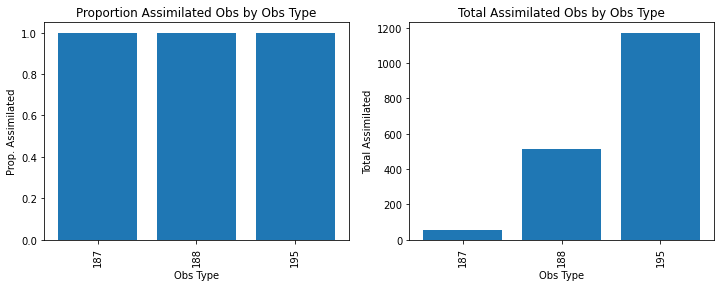

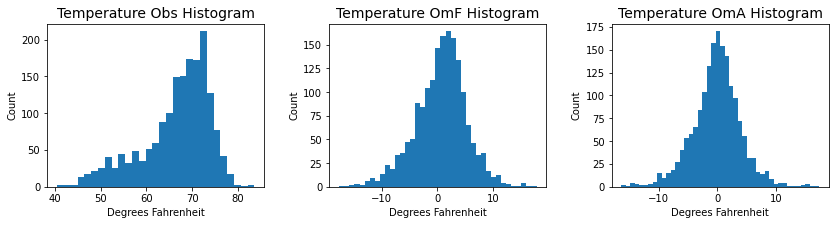

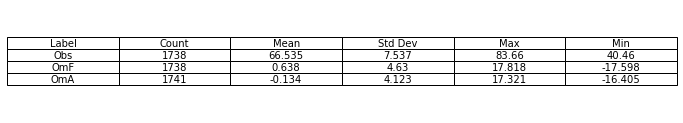

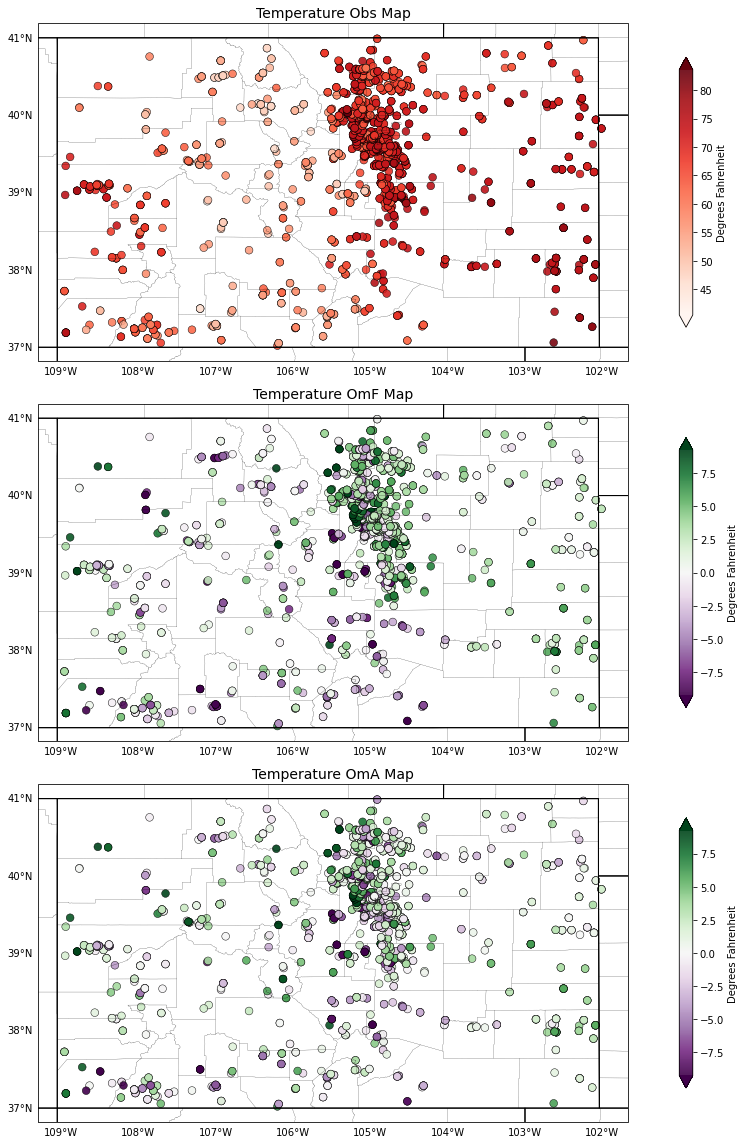

In [14]:
make_base_plots([rtma_df_ges_fil, rtma_df_anl_fil], rtma_diag_ges.metadata, zoom=False)

# RRFS Diag Files

In [15]:
#temperature diag files jet
rrfs_diag_ges_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod/rrfs.{day_str}/{hour_str}/diag_conv_{variable}_ges.{date_str}.nc4.gz'
rrfs_diag_anl_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod/rrfs.{day_str}/{hour_str}/diag_conv_{variable}_anl.{date_str}.nc4.gz'

In [22]:
# #temperature diag files local
# rrfs_diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
# rrfs_diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

In [23]:
rrfs_diag_ges_fp

'/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod/rrfs.20240723/14/diag_conv_t_ges.2024072314.nc4.gz'

## Query data

In [24]:
rrfs_diag_ges = Conventional(rrfs_diag_ges_fp)
rrfs_diag_anl = Conventional(rrfs_diag_anl_fp)
rrfs_df_ges = rrfs_diag_ges.get_data()
rrfs_df_anl = rrfs_diag_anl.get_data()

In [25]:
print(len(rrfs_df_ges))

62261


In [26]:
print(len(rrfs_df_anl))

62261


## Filtering dataframes

### Filter df

In [31]:
# temp examples
# rrfs_fil_dfs = filter_df([rrfs_df_anl, rrfs_df_ges], use =1)
rrfs_fil_dfs = filter_df([rrfs_df_anl, rrfs_df_ges], obs_types=obs_types_sur_temp, use=1,
                    lat_range=co_lats,lon_range=co_lons)

rrfs_df_anl_fil = rrfs_fil_dfs[0]
rrfs_df_ges_fil = rrfs_fil_dfs[1]
print(len(rrfs_df_anl_fil))
print(len(rrfs_df_ges_fil))

394
395


In [32]:
rrfs_obs_types = rrfs_df_anl_fil['observation_type']

### Make plots

In [33]:
# make_base_plots([rrfs_df_ges_fil, rrfs_df_anl_fil], diag_ges.metadata, shared_norm = to_share_norm, save_plots=True, zoom=True)

------------ Temperature Data Assimilation Statistics and Plots ------------




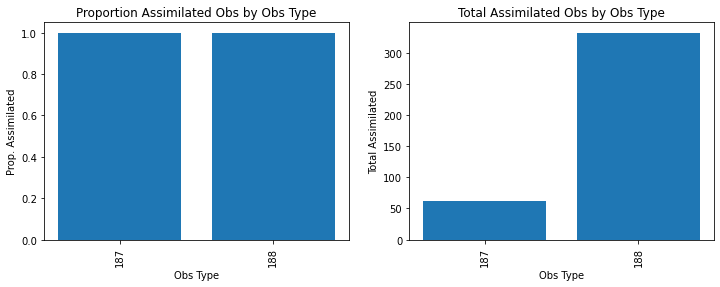

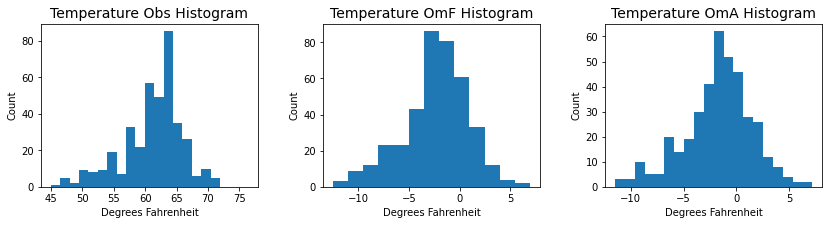

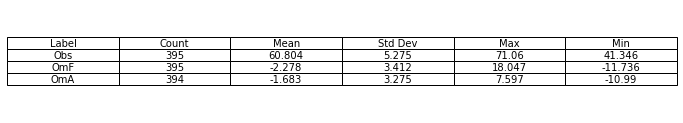

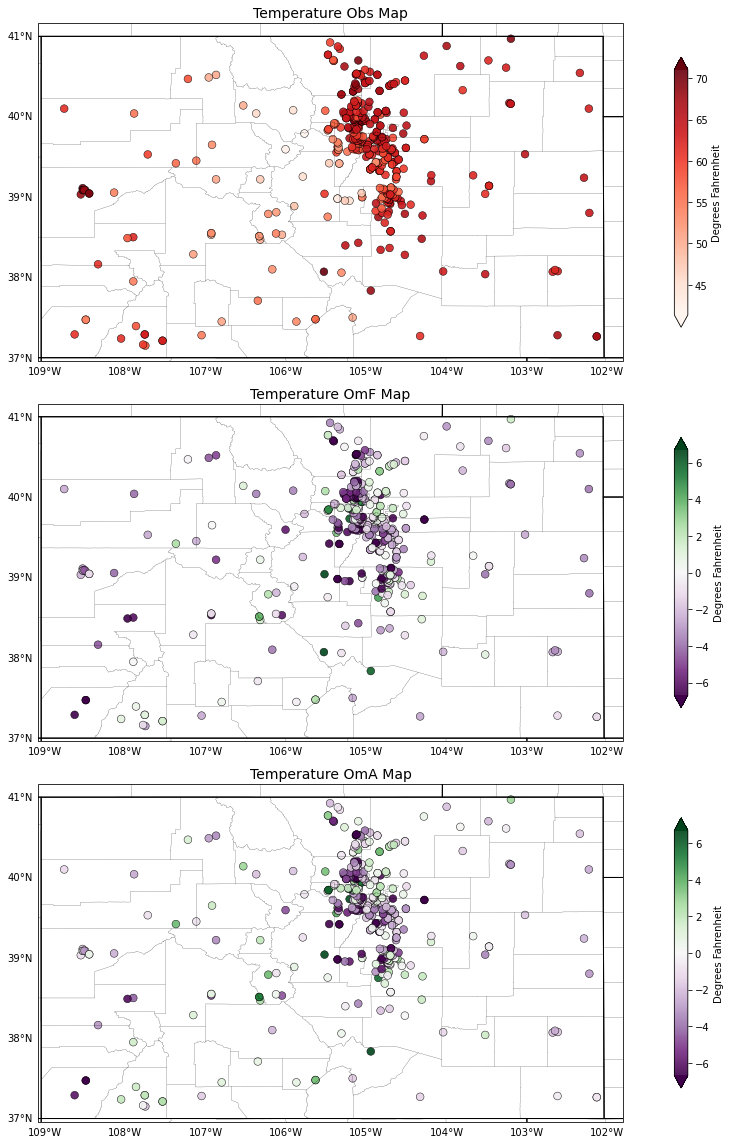

In [34]:
make_base_plots([rrfs_df_ges_fil, rrfs_df_anl_fil], rrfs_diag_ges.metadata, shared_norm = to_share_norm, zoom=False)

## Obs Type Comp Bar Graph

Created manually

In [36]:
fil_rtma_obs_types = [x for x in rtma_obs_types if x != 195]

In [40]:
array1 = rrfs_obs_types.to_numpy()
array2 = rtma_obs_types.to_numpy()

In [41]:
type(array1)

numpy.ndarray

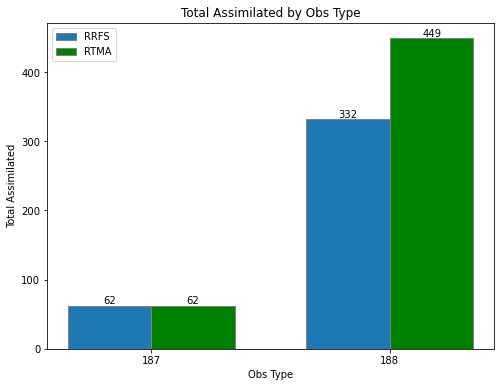

In [50]:
# Count the occurrences of 187 and 188 in each array
count_187_array1 = (array1 == 187).sum()
count_188_array1 = (array1 == 188).sum()
count_187_array2 = (array2 == 187).sum()
count_188_array2 = (array2 == 188).sum()

# Data for the histogram
values = ['187', '188']
counts_array1 = [count_187_array1, count_188_array1]
counts_array2 = [count_187_array2, count_188_array2]

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = range(len(values))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(8, 6))

# Plotting
bars1 = plt.bar(r1, counts_array1, width=bar_width, edgecolor='grey', label='RRFS')
bars2 = plt.bar(r2, counts_array2, color='green', width=bar_width, edgecolor='grey', label='RTMA')

# Adding labels and title
plt.xlabel('Obs Type')
plt.ylabel('Total Assimilated')
plt.title('Total Assimilated by Obs Type')
plt.xticks([r + bar_width / 2 for r in range(len(values))], values)
plt.legend()

# Adding numbers on each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

# Show the plot
plt.show()

## Wind plots

In [17]:
#wind diag files on jet
diag_uv_ges_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_uv_ges.{date_str}.nc4.gz'
diag_uv_anl_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_uv_anl.{date_str}.nc4.gz'

In [18]:
#wind diag files local
# diag_uv_ges_fp = '../example_data/diag_conv_uv_ges.2024031812.nc4'
# diag_uv_anl_fp = '../example_data/diag_conv_uv_anl.2024031812.nc4'

In [19]:
#Wind Diag file
diag_uv_ges = Conventional(diag_uv_ges_fp)
diag_uv_anl = Conventional(diag_uv_anl_fp)
df_uv_ges = diag_uv_ges.get_data()
df_uv_anl = diag_uv_anl.get_data()

In [21]:
df_uv_anl

,station_id,observation_class,observation_type,observation_subtype,latitude,longitude,station_elevation,pressure,height,time,prep_qc_mark,setup_qc_mark,nonlinear_qc_var_jb,prep_use_flag,analysis_use_flag,nonlinear_qc_rel_wgt,errinv_input,errinv_adjust,error,wind_reduction_factor_at_10m,u_observation,u_omf_adjusted,u_omf_unadjusted,v_observation,v_omf_adjusted,v_omf_unadjusted,dominant_sfc_type,model_terrain,u_hofx_unadjusted,u_hofx_adjusted,v_hofx_unadjusted,v_hofx_adjusted
0,IR270,uv,245,0,22.714550,238.176666,110095.0,926.299988,70.0,-1.00,2.0,1.000000e+09,0.0,0.0,0.0,4.0,5.263158e-01,5.263158e-01,2.938736e-39,1.0,-1.470687,-0.235336,-0.235336,-4.040679,0.266119,0.266119,0.0,0.000000,-1.235350,-1.235350,-4.306798,-4.306798
1,IR270,uv,245,0,23.010731,238.252380,110093.0,923.099976,64.0,-1.00,2.0,1.000000e+09,0.0,0.0,0.0,4.0,5.263158e-01,5.263158e-01,2.938736e-39,1.0,-1.576819,-0.838329,-0.838329,-4.107754,-0.619591,-0.619591,0.0,0.000000,-0.738490,-0.738490,-3.488162,-3.488162
2,IR272,uv,245,0,22.466221,237.796371,110099.0,923.799988,71.0,-1.00,2.0,1.000000e+09,0.0,0.0,0.0,4.0,5.263158e-01,5.263158e-01,2.938736e-39,1.0,-1.562925,-0.467730,-0.467730,-3.682019,0.368979,0.368979,0.0,0.000000,-1.095194,-1.095194,-4.050998,-4.050998
3,IR272,uv,245,0,22.157230,237.756638,110097.0,932.299988,70.0,-1.00,2.0,1.000000e+09,0.0,0.0,0.0,4.0,5.263158e-01,5.263158e-01,2.938736e-39,1.0,-1.433472,0.249720,0.249720,-3.734322,1.467092,1.467092,0.0,0.000000,-1.683192,-1.683192,-5.201414,-5.201414
4,IR272,uv,245,0,22.136669,237.754013,110097.0,932.299988,70.0,-1.00,2.0,1.000000e+09,0.0,0.0,0.0,4.0,5.263158e-01,5.263158e-01,2.938736e-39,1.0,-1.433472,0.266705,0.266705,-3.734322,1.413592,1.413592,0.0,0.000000,-1.700177,-1.700177,-5.147913,-5.147913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142686,G0273,uv,288,0,46.915501,299.505005,1.0,996.565369,11.0,-0.25,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000e+00,1.000000e+00,5.890181e-01,1.0,1.500000,-3.672671,-3.672671,2.300000,-0.003137,-0.003137,4.0,140.548123,5.172671,5.172671,2.303137,2.303137
142687,G0273,uv,288,0,46.915501,299.505005,1.0,996.565369,11.0,0.00,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000e+00,1.000000e+00,5.890181e-01,1.0,0.400000,-4.772671,-4.772671,3.600000,1.296863,1.296863,4.0,140.548123,5.172671,5.172671,2.303137,2.303137
142688,F0816,uv,288,0,47.002831,299.533661,10.0,1001.097595,20.0,-0.25,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000e+00,1.000000e+00,6.882948e-01,1.0,0.200000,-5.217513,-5.217513,2.200000,-0.059968,-0.059968,4.0,100.573168,5.417513,5.417513,2.259968,2.259968
142689,F0816,uv,288,0,47.002831,299.533661,10.0,1001.097595,20.0,0.00,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000e+00,1.000000e+00,6.882948e-01,1.0,0.500000,-4.917513,-4.917513,0.800000,-1.459968,-1.459968,4.0,100.573168,5.417513,5.417513,2.259968,2.259968


In [23]:
# wind examples
# fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], hem='CONUS', use=1)
fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], lat_range=co_lats, lon_range=co_lons)

df_uv_anl_fil = fil_uv_dfs[0]
df_uv_ges_fil = fil_uv_dfs[1]
print(len(df_uv_anl_fil))
print(len(df_uv_ges_fil))

81
81


In [24]:
# make_wind_base_plots([df_uv_anl_fil, df_uv_ges_fil], diag_uv_ges.metadata, save_plots=True)

------------ Wind Data Assimilation Statistics and Plots ------------


Observation Type: 287

Proportion Assimilated: 0.790123462677002



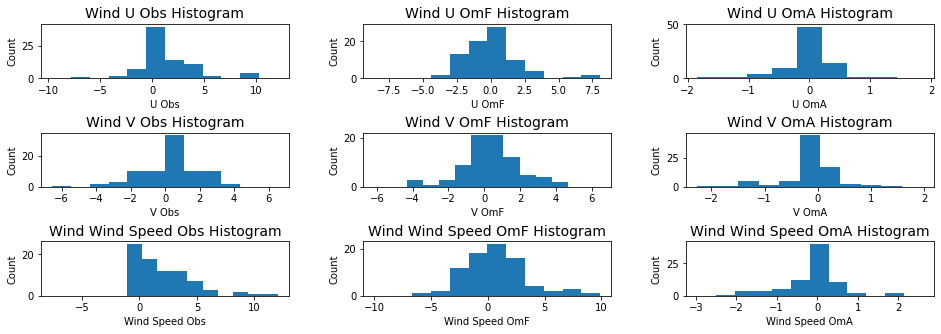

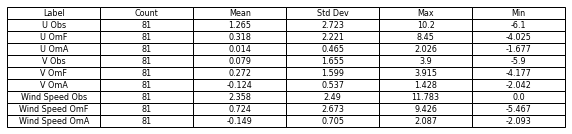

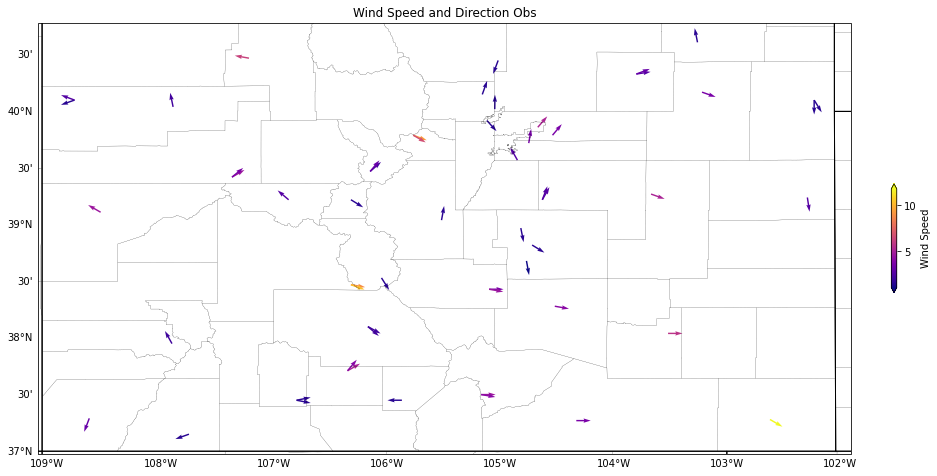

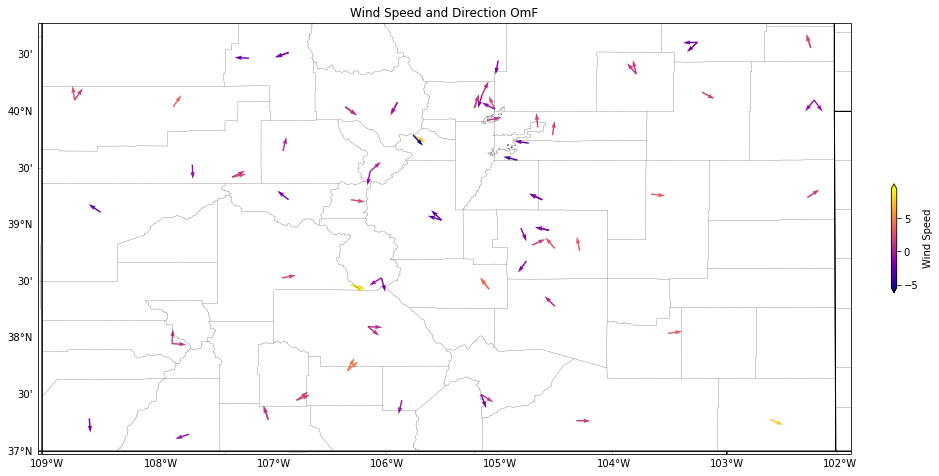

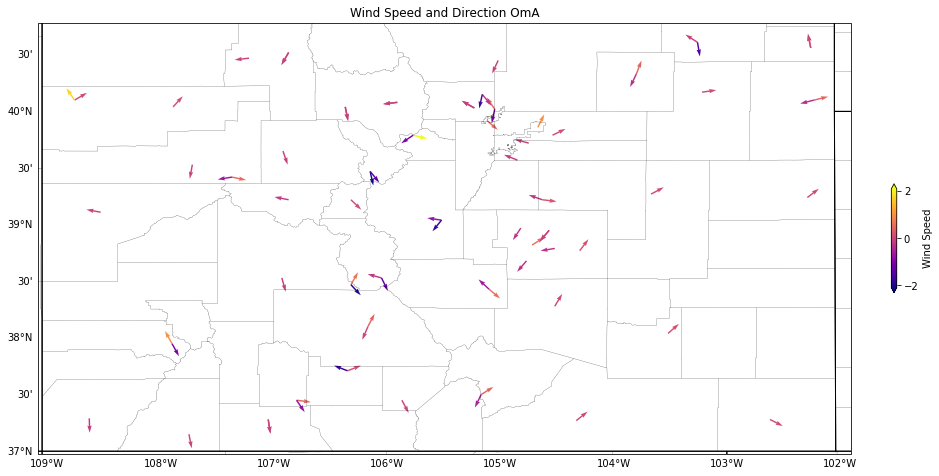

In [25]:
make_wind_base_plots([df_uv_ges_fil, df_uv_anl_fil], diag_uv_ges.metadata)

# Exploring time series plots

In [ ]:
# Get the yesterdays date
today = datetime.today()
yesteryesterday = today - timedelta(days=1)

# Format date
date = yesteryesterday.strftime('%Y%m%d')
print(date)

In [ ]:
rrfs_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/v0.8.8/com/prod/"
rtma_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS." + date

## Dataframe for reference

In [ ]:
# test_hr = '20'
# test_fp = f"{rtma_data_fp}/{test_hr}/diag_conv_t_anl.{date}{test_hr}.nc4.gz"
# test_df = Conventional(test_fp).get_data()

In [ ]:
# station_ids = ['G4CUISJA']
station_ids = None
obs_types = None
rtma_path = '/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod'
rrfs_path = '/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod'

# Get a list of strings with all hours of daya
var = 't'

# Get the current date and time in UTC
now_utc = datetime.now(timezone.utc)
f_time = now_utc.replace(minute=0, second=0, microsecond=0)
s_time = f_time - timedelta(days=2)
s_time = s_time.replace(hour=0)

date_times = pd.date_range(start=s_time, end=f_time, freq='H')

In [ ]:
time_series.plot_time_series([rtma_path, rrfs_path], models = ['rtma_conus', 'rrfs'], 
                             var = var, anl_ges='anl', s_time=s_time, f_time=f_time)

## Testing command line plot making function

In [ ]:
# path = '/Users/aidenpape/Desktop/noaa/code/pyDAmonitor/example_data' #aiden's laptop
path = '/lfs5/BMC/wrfruc/aiden.pape/pyDAmonitor/example_data' #jet
model = 'rtma'
date_time = '2024031812'
var = 't'

In [ ]:
da_base_plots(path, model, date_time, var)

## Try to read grib files